In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

df1 = pd.read_csv("obesity_election_2004.csv")
df2 = pd.read_csv("obesity_election_2000.csv")

df1.columns = ['states', 'per', 'result', 'short']
df2.columns = ['states', 'per', 'result', 'short']
df1['per'] = df1['per'].str.rstrip('%').astype('float') / 100.0
df2['per'] = df2['per'].str.rstrip('%').astype('float') / 100.0
df1['result'] = df1['result'].map({'R': 0, 'D': 1})
df2['result'] = df2['result'].map({'R': 0, 'D': 1})

x_train = df1[['per']].values  
y_train = df1['result'].values  

x_test = df2[['per']].values  
y_test = df2['result'].values  

loo = LeaveOneOut()
k_range = range(1, 20)
best_k = 0
best_accuracy = 0

for k in k_range:
    accuracies = []
    knn = KNeighborsClassifier(n_neighbors=k)

    for train_index, test_index in loo.split(x_train):
        x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        knn.fit(x_train_fold, y_train_fold)
        y_pred_fold = knn.predict(x_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Best k: 8
Best accuracy: 0.72
Test Accuracy: 48.00%


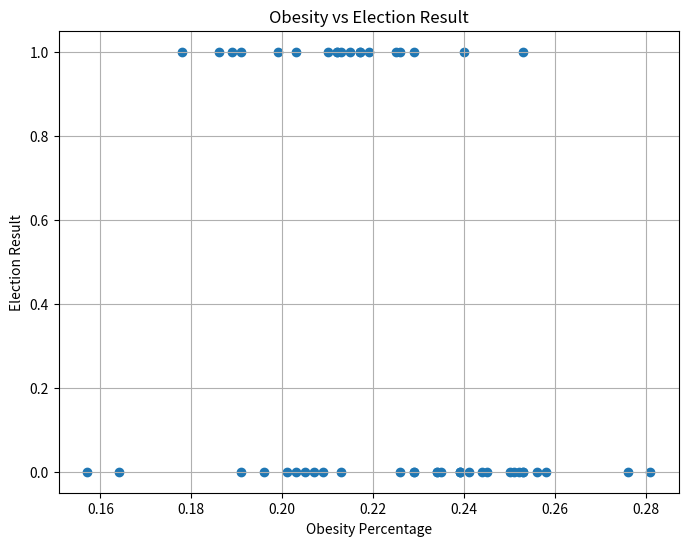

In [36]:

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)
plt.title('Obesity vs Election Result')
plt.xlabel('Obesity Percentage')
plt.ylabel('Election Result')
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score


df1 = pd.read_csv("obesity_election_2004.csv")
df2 = pd.read_csv("obesity_election_2000.csv")

df1.columns = ['states', 'per', 'result', 'short']
df2.columns = ['states', 'per', 'result', 'short']
df1['per'] = df1['per'].str.rstrip('%').astype('float') / 100.0
df2['per'] = df2['per'].str.rstrip('%').astype('float') / 100.0
df1['result'] = df1['result'].map({'R': 0, 'D': 1})
df2['result'] = df2['result'].map({'R': 0, 'D': 1})


x_train = df1[['per']]
y_train = df1['result']

x_test = df2[['per']]
y_test = df2['result']


svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf')
svm_poly = svm.SVC(kernel='poly')


svm_linear.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)


y_pred_linear = svm_linear.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)
y_pred_poly = svm_poly.predict(x_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f"Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%")
print(f"Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly * 100:.2f}%")



Accuracy (Linear Kernel): 58.00%
Accuracy (RBF Kernel): 40.00%
Accuracy (Polynomial Kernel): 54.00%


In [8]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score


df1 = pd.read_csv("obesity_election_2004.csv")
df2 = pd.read_csv("obesity_election_2000.csv")

df1.columns = ['states', 'per', 'result', 'short']
df2.columns = ['states', 'per', 'result', 'short']
df1['per'] = df1['per'].str.rstrip('%').astype('float') / 100.0
df2['per'] = df2['per'].str.rstrip('%').astype('float') / 100.0
df1['result'] = df1['result'].map({'R': 0, 'D': 1})
df2['result'] = df2['result'].map({'R': 0, 'D': 1})


x_train = df1[['per']]
y_train = df1['result']

x_test = df2[['per']]
y_test = df2['result']


from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf', 'poly']  
}


svm_classifier = svm.SVC()


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


y_pred_best = best_estimator.predict(x_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy after GridSearchCV: {accuracy_best * 100:.2f}%")




Best Accuracy after GridSearchCV: 58.00%


In [38]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


df1 = pd.read_csv("obesity_election_2004.csv")
df2 = pd.read_csv("obesity_election_2000.csv")

df1.columns = ['states', 'per', 'result', 'short']
df2.columns = ['states', 'per', 'result', 'short']
df1['per'] = df1['per'].str.rstrip('%').astype('float') / 100.0
df2['per'] = df2['per'].str.rstrip('%').astype('float') / 100.0
df1['result'] = df1['result'].map({'R': 0, 'D': 1})
df2['result'] = df2['result'].map({'R': 0, 'D': 1})



X_train = df1[['per']]
Y_train = df1['result']

X_test = df2[['per']]
Y_test = df2['result']
           

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model.fit(X_train, Y_train, epochs=30, batch_size=20)
Y_pred = model.predict(X_test)
print(Y_pred)
Y_pred = (Y_pred > 0.5).astype(int)

test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/30
3/3 [==============================] - 1s 5ms/step - loss: 0.6895 - accuracy: 0.5800
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.6000
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.6200
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 0.6788 - accuracy: 0.6200
Epoch 5/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6200
Epoch 6/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.6200
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.6200
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.6200
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6697 - accuracy: 0.6200
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.6695 - accuracy: 0.6200
Epoch 11/30
3/3 [=====================